In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Reading CSV files
# reading alcohol consumption file
alcohol_consumption = pd.read_csv("../Clean Data/AlcoholConsumptionClean.csv")
alcohol_consumption.head()

,Country,Country Code,Year,Alcohol Consumption (Liter per capita)
0,Afghanistan,AFG,2016,0.2
1,Albania,ALB,2016,7.5
2,Algeria,DZA,2016,0.9
3,Andorra,AND,2016,11.3
4,Angola,AGO,2016,6.4


In [3]:
# Reading Education Index file
education_index = pd.read_csv("../Clean Data/EducationIndexClean.csv")
education_index.head()

,Country,2016,2017
0,Afghanistan,0.410,0.415
1,Albania,0.742,0.745
2,Algeria,0.663,0.664
3,Andorra,0.714,0.714
4,Angola,0.487,0.498


In [4]:
# Renaming columns using a dictionary in Education Index file
rename_dict={"2016":"Education Index 2016",
             "2017":"Education Index 2017"}
education_index1=education_index.rename(columns=rename_dict)
education_index1.head()

,Country,Education Index 2016,Education Index 2017
0,Afghanistan,0.410,0.415
1,Albania,0.742,0.745
2,Algeria,0.663,0.664
3,Andorra,0.714,0.714
4,Angola,0.487,0.498


In [5]:
# reading file Happiness
happy_index = pd.read_csv("../Clean Data/Happinessclean.csv")
happy_index.head()

,Unnamed: 0,Country,2018,2017,2016,2015
0,0,Finland,7.63,7.47,7.41,7.41
1,1,Norway,7.59,7.54,7.50,7.52
2,2,Denmark,7.56,7.52,7.53,7.53
3,3,Iceland,7.50,7.50,7.50,7.56
4,4,Switzerland,7.49,7.49,7.51,7.59


In [6]:
# getting rid of column Unnamed in Happiness file
happy_index1 = happy_index[["Country","2018","2017","2016","2015"]]
happy_index1.head()

,Country,2018,2017,2016,2015
0,Finland,7.63,7.47,7.41,7.41
1,Norway,7.59,7.54,7.50,7.52
2,Denmark,7.56,7.52,7.53,7.53
3,Iceland,7.50,7.50,7.50,7.56
4,Switzerland,7.49,7.49,7.51,7.59


In [7]:
# Merging both dataframes
happy_Alc_df = pd.merge(happy_index1, alcohol_consumption, on="Country",how="outer")
happy_Alc_df.head()

,Country,2018,2017,2016,2015,Country Code,Year,Alcohol Consumption (Liter per capita)
0,Finland,7.63,7.47,7.41,7.41,FIN,2016.0,10.7
1,Norway,7.59,7.54,7.50,7.52,NOR,2016.0,7.5
2,Denmark,7.56,7.52,7.53,7.53,DNK,2016.0,10.4
3,Iceland,7.50,7.50,7.50,7.56,ISL,2016.0,9.1
4,Switzerland,7.49,7.49,7.51,7.59,CHE,2016.0,11.5


In [8]:
happy_Alc_2016 = happy_Alc_df[["Country","2016","Alcohol Consumption (Liter per capita)"]]
rename_col = {"2016":"Happiness Index_2016",
              "Alcohol Consumption (Liter per capita)":"Alc_Consumption LPC"} 
happy_Alc_2016_df1 = happy_Alc_2016.rename(columns = rename_col)
happy_Alc_2016_df2 = happy_Alc_2016_df1.dropna(how ='any')
# happy_Alc_2016_df1.to_csv("../Clean Data/happy_Alc_2016_df1.csv")
# happy_Alc_2016_df2 = pd.read_csv("../Clean Data/happy_Alc_2016_df1.csv")
happy_Alc_2016_df2.head()

,Country,Happiness Index_2016,Alc_Consumption LPC
0,Finland,7.41,10.7
1,Norway,7.50,7.5
2,Denmark,7.53,10.4
3,Iceland,7.50,9.1
4,Switzerland,7.51,11.5


In [9]:
happy_Alc_2016_df1.isnull().sum()

Country                  0
Happiness Index_2016    49
Alc_Consumption LPC      6
dtype: int64

In [10]:
happy_Alc_2016_df2.isnull().sum()

Country                 0
Happiness Index_2016    0
Alc_Consumption LPC     0
dtype: int64

In [11]:
happy_Alc_2016_df2.shape

(138, 3)

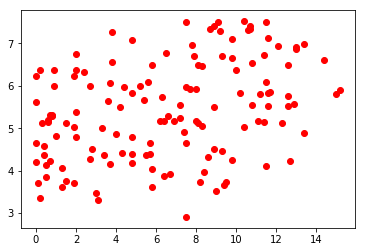

In [12]:
plt.scatter(happy_Alc_2016_df2["Alc_Consumption LPC"], happy_Alc_2016_df2["Happiness Index_2016"], marker="o", color="red" )
plt.show()

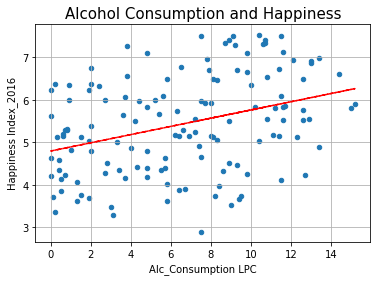

In [40]:
# use linear regression to find correlation between alcohol consumption and happiness index
(slope, intercept, r_value, _, _) = linregress(happy_Alc_2016_df2["Alc_Consumption LPC"], happy_Alc_2016_df2["Happiness Index_2016"])
fit = slope * happy_Alc_2016_df2["Alc_Consumption LPC"] + intercept

happy_Alc_2016_df2.plot.scatter(x="Alc_Consumption LPC", y="Happiness Index_2016")
plt.plot(happy_Alc_2016_df2["Alc_Consumption LPC"], fit, 'r--')
plt.title("Alcohol Consumption and Happiness", fontsize=15)
plt.grid()

In [14]:
r_value

0.3518591659601554

In [15]:
# A surprising finding in this analysis is that happier nations consume more alcohol than unhappy ones.
# As we can see alcohol consumption  is higher in happier natios, with a correlation of 0.35 in 2016. 

# Our next questions to be investigated are: 
# Is drinking more prevalent in poorer or richer countries?
# Is drinking more prevalent in countries with higher education index?


In [16]:
education_index.head()

,Country,2016,2017
0,Afghanistan,0.410,0.415
1,Albania,0.742,0.745
2,Algeria,0.663,0.664
3,Andorra,0.714,0.714
4,Angola,0.487,0.498


In [17]:
happy_index1.head()

,Country,2018,2017,2016,2015
0,Finland,7.63,7.47,7.41,7.41
1,Norway,7.59,7.54,7.50,7.52
2,Denmark,7.56,7.52,7.53,7.53
3,Iceland,7.50,7.50,7.50,7.56
4,Switzerland,7.49,7.49,7.51,7.59


In [19]:
# Merging both dataframes
happy_Edu_df = pd.merge(happy_index1, education_index, on="Country",how="outer")
happy_Edu_df.to_csv("../Bad Data/happy_Edu_df.csv")
happy_Edu_df.head()

,Country,2018,2017_x,2016_x,2015,2016_y,2017_y
0,Finland,7.63,7.47,7.41,7.41,0.905,0.905
1,Norway,7.59,7.54,7.50,7.52,0.915,0.915
2,Denmark,7.56,7.52,7.53,7.53,0.920,0.920
3,Iceland,7.50,7.50,7.50,7.56,0.912,0.912
4,Switzerland,7.49,7.49,7.51,7.59,0.897,0.897


In [22]:
# renaming columns and droping NaN
happy_Edu_2016df = happy_Edu_df[["Country","2016_x","2016_y"]]
rename_columns_1= {"2016_x":"Happiness Index 2016",
                   "2016_y":"Education Index 2016"} 
happy_Edu_2016df1 = happy_Edu_2016df.rename(columns = rename_columns_1)
happy_Edu_2016df2 = happy_Edu_2016df1.dropna(how ='any')
happy_Edu_2016df2.to_csv("../Clean Data/happy_Edu_2016df2.csv")
happy_Edu_2016df2.head()

,Country,Happiness Index 2016,Education Index 2016
0,Finland,7.41,0.905
1,Norway,7.50,0.915
2,Denmark,7.53,0.920
3,Iceland,7.50,0.912
4,Switzerland,7.51,0.897


In [24]:
happy_Edu_2016df2.isnull().sum()

Country                 0
Happiness Index 2016    0
Education Index 2016    0
dtype: int64

In [25]:
happy_Edu_2016df2.shape

(141, 3)

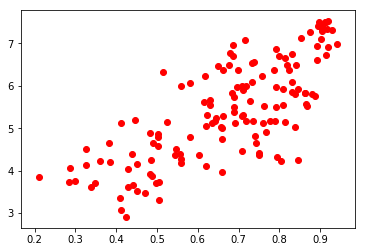

In [26]:
plt.scatter(happy_Edu_2016df2["Education Index 2016"], happy_Edu_2016df2["Happiness Index 2016"], marker="o", color="red" )
plt.show()

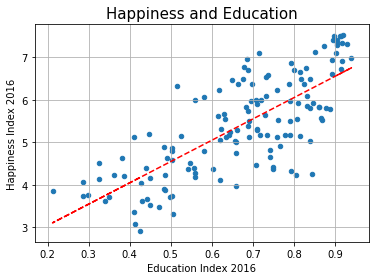

In [42]:
# use linear regression to find correlation between Education Index and happiness index
(slope, intercept, r_value, _, _) = linregress(happy_Edu_2016df2["Education Index 2016"],happy_Edu_2016df2["Happiness Index 2016"])
fit = slope * happy_Edu_2016df2["Education Index 2016"] + intercept

happy_Edu_2016df2.plot.scatter(x="Education Index 2016", y="Happiness Index 2016")
plt.plot(happy_Edu_2016df2["Education Index 2016"], fit, 'r--')
plt.title("Happiness and Education", fontsize=15)
plt.grid()

In [31]:
r_value

0.760359545305715

In [32]:
# This analysis shows that happier nations have a higher Education index than unhappy ones.
# As we can see Education is higher in happier natios, with a strong correlation of 0.76 in 2016. 